# Deep learning Project steps

# Task 0  Data Augmentation,

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
path = '/content/drive/MyDrive/github/objectdetection'

## Task 1: Load Images

In [10]:
import os
import cv2

def load_images(directory, image_size=(150, 150)):
    X_values = []
    y_values = []

    for each_folder in os.listdir(directory):
        if each_folder != '.DS_Store':
            sub_path = f'{directory}/{each_folder}'

            for each_image in os.listdir(sub_path):
                if each_image != '.DS_Store':
                    image = cv2.cvtColor(cv2.resize(cv2.imread(
                        f'{sub_path}/{each_image}'),
                        image_size), cv2.COLOR_BGR2RGB)

                    X_values.append(image)
                    y_values.append(int(each_folder[0]))

    return X_values, y_values

In [11]:
IMAGE_SIZE = (150, 150)
X_values, y_values = load_images(directory=path+'/data', image_size=IMAGE_SIZE)
print(f'{len(X_values)}')
print(f'{len(y_values)}')


60
60


## Task 2: import numpy and Convert X_values into a Numpy Array

In [12]:
import numpy as np

X_values = np.array(X_values)



## Task 3: Convert y_values into a Numpy Array

In [13]:

y_values = np.array(y_values)




## Task 4: Normalise X_values

In [14]:
import numpy as np
X_values = np.array(X_values)
X_values = X_values / 255.0




## Task 6: Reshape X_values to be a 4-D Tensor

In [15]:
X_values = X_values.reshape(-1, 150, 150, 3)


## Task 7: Import pyplot and Display 10 Images

In [16]:
import random
import matplotlib.pyplot as plt
def plot(num_columns, num_rows):
    _, axis = plt.subplots(ncols = num_columns, nrows = num_rows)

    for each_row in range(num_rows):
        for each_column in range(num_columns):
            index = random.randint(0, len(X_values) - 1)

            axis[each_row][each_column].imshow(X_values[index], cmap = "gray")
            axis[each_row][each_column].set_title(y_values[index])
            axis[each_row][each_column].axis('off')

    return None

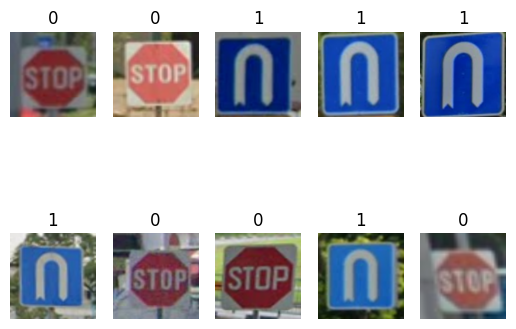

In [17]:
plot(5,2)

## Task 8: split dataset into train and test Dataset

In [18]:
# Ensure X_values and y_array have the same number of samples
from sklearn.model_selection import train_test_split


 # Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X_train: (48, 150, 150, 3)
Shape of y_train: (48,)


## Task 9: Import library and Create a Model using Keras Sequential API

In [19]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# WRITE YOUR CODE BELOW THIS LINE
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# WRITE YOUR CODE ABOVE THIS LINE

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Task 10: Compile Model

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Task 11: Train the Model

In [21]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2/2 [==============================] - 6s 2s/step - loss: 1.8262 - accuracy: 0.1667 - val_loss: 0.8869 - val_accuracy: 0.6667
Epoch 2/10
2/2 [==============================] - 2s 806ms/step - loss: 1.0533 - accuracy: 0.6250 - val_loss: 0.8461 - val_accuracy: 0.5833
Epoch 3/10
2/2 [==============================] - 2s 823ms/step - loss: 0.2219 - accuracy: 0.8958 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 2s 971ms/step - loss: 0.0787 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 2s 784ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.3278 - val_accuracy: 0.9167
Epoch 6/10
2/2 [==============================] - 2s 1s/step - loss: 0.0393 - accuracy: 0.9792 - val_loss: 0.3123 - val_accuracy: 0.9167
Epoch 7/10
2/2 [==============================] - 5s 2s/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 8/10
2/2 [=============

## Task 12: Visualise the Training and Validation Loss

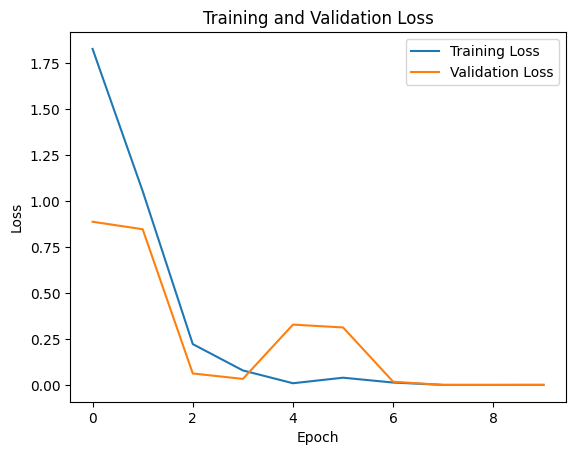

In [22]:
# WRITE YOUR CODE BELOW THIS LINE
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a plot to visualize the training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# WRITE YOUR CODE ABOVE THIS LINE

## Task 13: Visualise the Training and Validation Accuracy

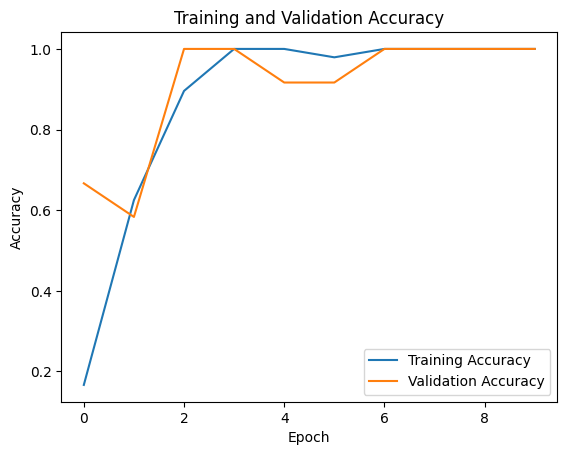

In [23]:
# WRITE YOUR CODE BELOW THIS LINE
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create a plot to visualize the training and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# WRITE YOUR CODE ABOVE THIS LINE

## Task 14: Predict the classes based on X_test

In [24]:
# WRITE YOUR CODE BELOW THIS LINE
predictions = model.predict(X_test)

y_pred = np.round(predictions).flatten()

# WRITE YOUR CODE ABOVE THIS LINE
print(y_pred)


1/1 [==============================] - 1s 912ms/step
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# Task 15: Display consusion matrix


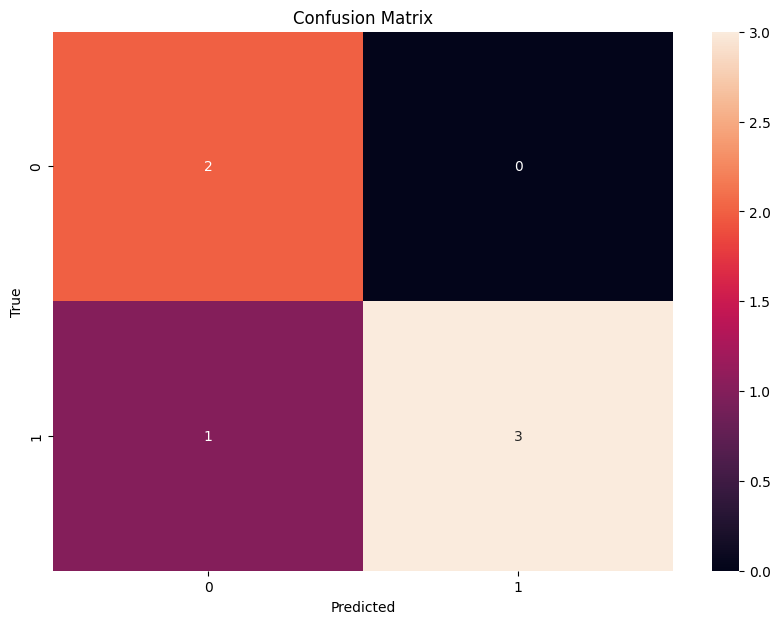

In [25]:

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true labels and predictions respectively
y_true = np.array([1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1])

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap=None)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Task 16: Display classification report

In [26]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



# Task 17 Save your model

In [27]:
# Define the path where you want to save the model
model_path = '/content/drive/MyDrive/github/objectdetection/model.h5'

# Save the model
model.save(model_path)

print("Model saved successfully at", model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at /content/drive/MyDrive/ITE/cv_essentials/Project/model.h5


#   End of Project